<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 161.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 166.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 157.6 MB/s eta 0:00:0000:01


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset, load data and display first few rows


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

df = pd.read_csv("survey-data.csv")
df.head()

--2025-05-30 21:13:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.4MB/s    in 2.5s    

2025-05-30 21:13:17 (60.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [3]:
print("JobSatPoints_6:\n", df['JobSatPoints_6'].describe())
print("\nJobSatPoints_7:\n", df['JobSatPoints_7'].describe())


JobSatPoints_6:
 count    29450.000000
mean        24.343232
std         27.089360
min          0.000000
25%          0.000000
50%         20.000000
75%         30.000000
max        100.000000
Name: JobSatPoints_6, dtype: float64

JobSatPoints_7:
 count    29448.00000
mean        22.96522
std         27.01774
min          0.00000
25%          0.00000
50%         15.00000
75%         30.00000
max        100.00000
Name: JobSatPoints_7, dtype: float64


In [4]:
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

In [5]:
df['Age'].head(20)

0     Under 18 years old
1        35-44 years old
2        45-54 years old
3        18-24 years old
4        18-24 years old
5     Under 18 years old
6        35-44 years old
7        18-24 years old
8        45-54 years old
9        35-44 years old
10       35-44 years old
11       45-54 years old
12       35-44 years old
13       35-44 years old
14       25-34 years old
15       45-54 years old
16    Under 18 years old
17       18-24 years old
18       25-34 years old
19       35-44 years old
Name: Age, dtype: object

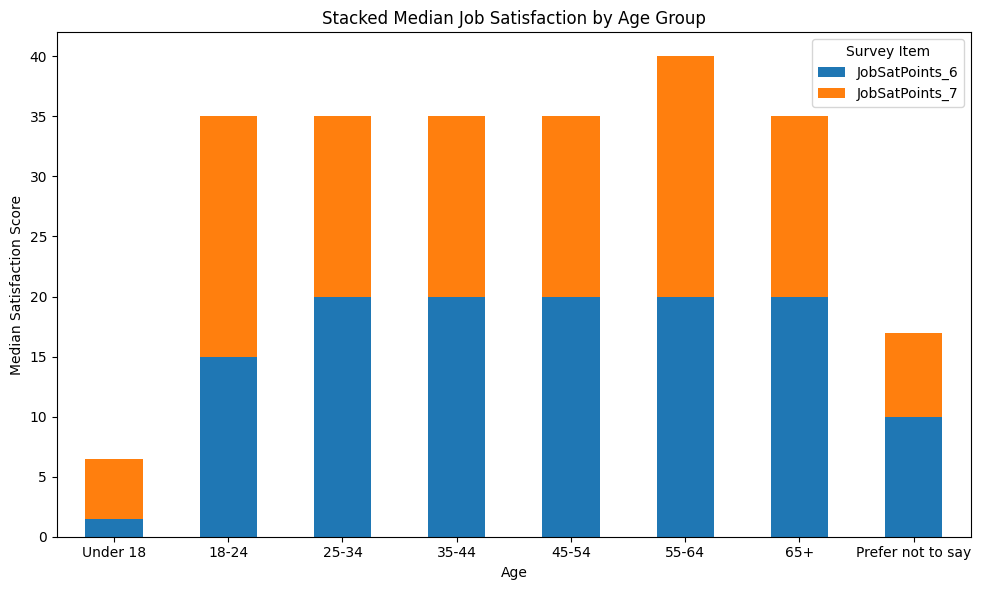

In [6]:
# Custom order of age groups
ordered_age_groups = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Reindex to enforce order (drop missing to avoid KeyErrors)
satisfaction_by_age = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
satisfaction_by_age = satisfaction_by_age.reindex(ordered_age_groups)

# Create cleaned labels
clean_labels = [label.replace(' years old', '').replace('65+', '65+') for label in satisfaction_by_age.index]
clean_labels = ['65+' if '65' in label else label for label in clean_labels]

# Plot
ax = satisfaction_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Stacked Median Job Satisfaction by Age Group')
ax.set_xlabel('Age')
ax.set_ylabel('Median Satisfaction Score')

ax.set_xticks(range(len(clean_labels)))
ax.set_xticklabels(clean_labels, rotation=0)

ax.legend(title='Survey Item')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [7]:
print(sorted(df.columns.to_list()))

['AIAcc', 'AIBen', 'AIChallenges', 'AIComplex', 'AIEthics', 'AINextLess integrated', 'AINextMore integrated', 'AINextMuch less integrated', 'AINextMuch more integrated', 'AINextNo change', 'AISearchDevAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISelect', 'AISent', 'AIThreat', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'Age', 'AgeNumeric', 'BuildvsBuy', 'BuyNewTool', 'Check', 'CodingActivities', 'CompTotal', 'ConvertedCompYearly', 'Country', 'Currency', 'DatabaseAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DevType', 'EdLevel', 'EmbeddedAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'Employment', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'Frustration', 'ICorPM', 'Industry', 'JobSat', 'JobSatPoints_1', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'Knowledge_1', 'Knowledge_2', 'Knowledg

In [8]:
df['Employment'].dropna().unique()


array(['Employed, full-time', 'Student, full-time',
       'Student, full-time;Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Student, part-time;Employed, part-time', 'I prefer not to say',
       'Not employed, but looking for work', 'Student, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, par

In [9]:
def simplify_employment_status(status):
    if pd.isna(status):
        return 'Unknown'
    
    status = status.lower()  # normalize for matching

    if 'prefer not to say' in status:
        return 'Other/Prefer not to say'
    elif 'retired' in status:
        return 'Retired'
    elif 'employed, full-time' in status:
        return 'Employed FT'
    elif 'employed, part-time' in status:
        return 'Employed PT'
    elif 'student' in status:
        return 'Student'
    elif 'not employed, but looking for work' in status:
        return 'Unemployed (seeking)'
    elif 'not employed, and not looking for work' in status:
        return 'Unemployed (not seeking)'
    elif 'independent contractor' in status or 'freelancer' in status or 'self-employed' in status:
        return 'Self-employed'

    return 'Other/Mixed'


In [10]:
df['EmploymentSimplified'] = df['Employment'].apply(simplify_employment_status)


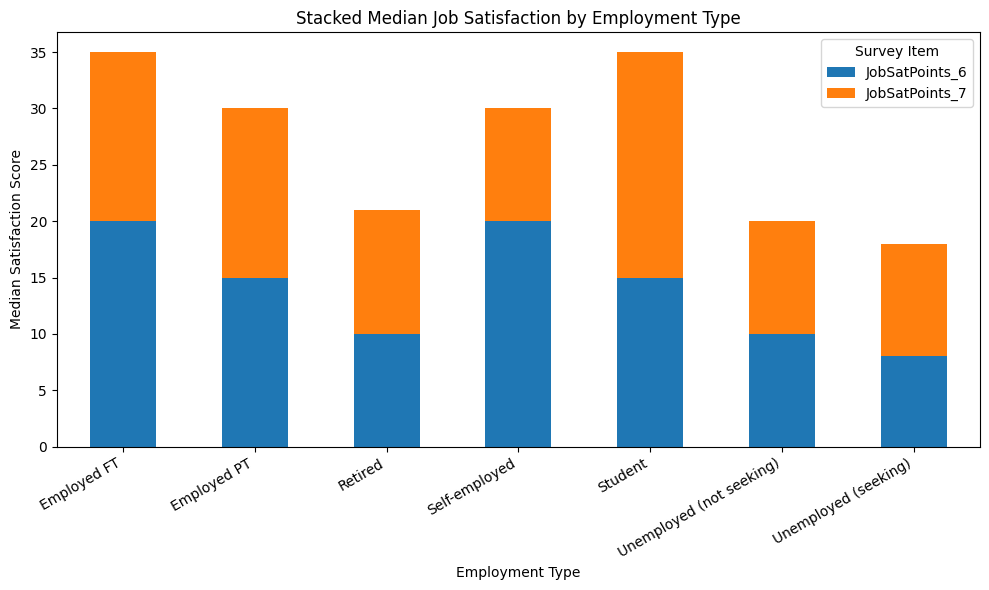

In [11]:
grouped = df.groupby('EmploymentSimplified')[['JobSatPoints_6', 'JobSatPoints_7']].median()
grouped = grouped.drop(index='Other/Prefer not to say', errors='ignore')

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Stacked Median Job Satisfaction by Employment Type')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Median Satisfaction Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend(title='Survey Item')
plt.tight_layout()
plt.show()


In [12]:
df['EmploymentSimplified'].value_counts()


EmploymentSimplified
Employed FT                 45130
Student                      7150
Self-employed                4846
Employed PT                  3624
Unemployed (seeking)         2769
Unemployed (not seeking)      691
Retired                       681
Other/Prefer not to say       546
Name: count, dtype: int64

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [13]:
print(df['AgeNumeric'].describe())
print(df['AgeNumeric'].unique())


count    65115.000000
mean        33.007871
std         11.264959
min         16.000000
25%         21.000000
50%         29.500000
75%         39.500000
max         70.000000
Name: AgeNumeric, dtype: float64
[16.  39.5 49.5 21.  29.5 59.5  nan 70. ]


In [14]:
df[df['AgeNumeric'].between(30, 35)].shape


(0, 116)

In [15]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


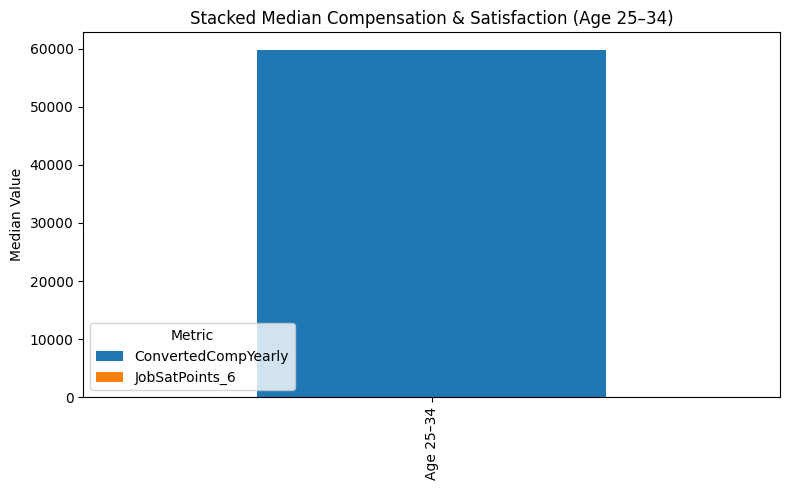

In [16]:
df_25_34 = df[df['Age'] == '25-34 years old']

# Calculate median for compensation and satisfaction
summary = df_25_34[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Format for plotting
summary_df = summary.to_frame().T
summary_df.index = ['Age 25–34']

# Plot
ax = summary_df.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_title('Stacked Median Compensation & Satisfaction (Age 25–34)')
ax.set_ylabel('Median Value')
ax.legend(title='Metric')
plt.tight_layout()
plt.show()


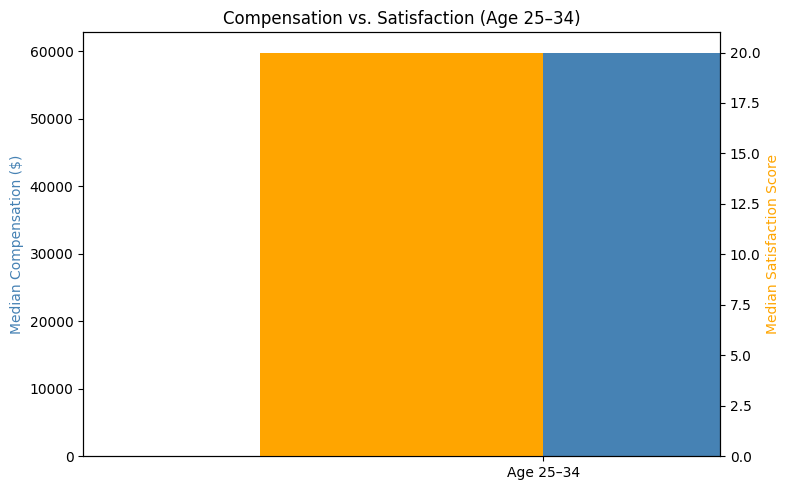

In [34]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax2 = ax1.twinx()
summary_df = summary.to_frame().T

summary_df['ConvertedCompYearly'].plot(kind='bar', ax=ax1, color='steelblue', position=0, width=0.4, label='Compensation')
summary_df['JobSatPoints_6'].plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4, label='Satisfaction')

ax1.set_ylabel('Median Compensation ($)', color='steelblue')
ax2.set_ylabel('Median Satisfaction Score', color='orange')
ax1.set_title('Compensation vs. Satisfaction (Age 25–34)')
ax1.set_xticklabels(['Age 25–34'], rotation=0)
plt.tight_layout()
plt.show()


In [19]:
# Step 1: Filter and copy first (to avoid SettingWithCopyWarning)
df_25_34 = df[df['Age'] == '25-34 years old'].copy()

# Step 2: Define bins and labels
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
labels = ['<$25k', '$25–50k', '$50–75k', '$75–100k', '$100–150k', '$150–200k', '$200k+']

# Step 3: Create new column in the copied DataFrame
df_25_34['SalaryBin'] = pd.cut(df_25_34['ConvertedCompYearly'], bins=bins, labels=labels)


/tmp/ipykernel_301/1952389434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_25_34, x='SalaryBin', y='JobSatPoints_6', palette='Set3')


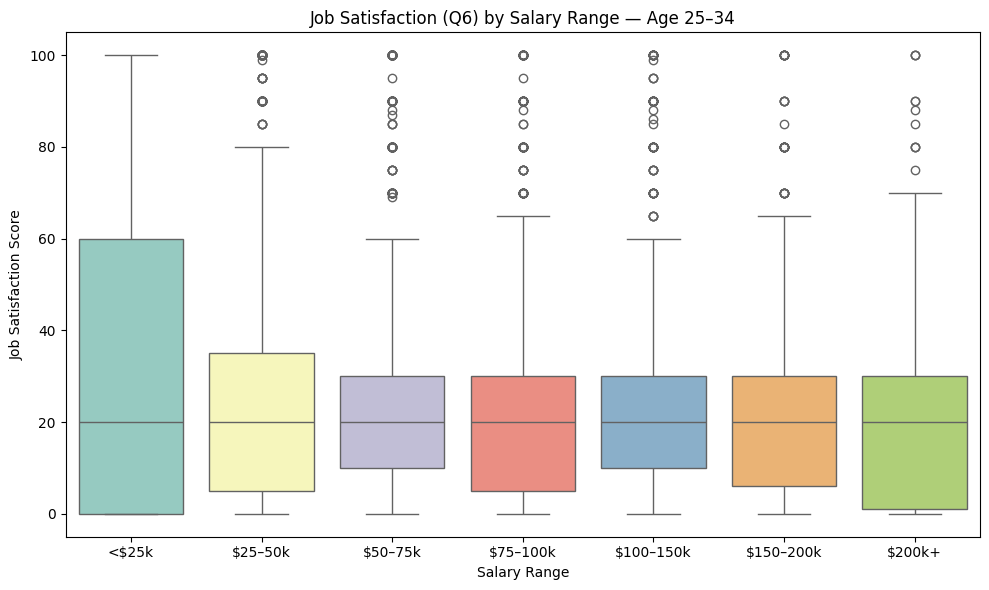

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_25_34, x='SalaryBin', y='JobSatPoints_6', palette='Set3')

plt.title('Job Satisfaction (Q6) by Salary Range — Age 25–34')
plt.xlabel('Salary Range')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()


This is a much **more insightful** plot than a stacked bar would have been. You’ve uncovered something subtle yet meaningful. Let’s break it down:

---

### Insight 1: **Median Job Satisfaction Is Flat**

* The **median line** is nearly constant across all income brackets, suggesting that:

  * **Income alone does not drive satisfaction** (at least not strongly),
  * or that other factors (e.g., autonomy, meaningful work, culture) have a stronger influence.

---

### Insight 2: **Satisfaction Is *More Variable* at Low Incomes**

* The **<\$25k group** has:

  * A **much wider IQR** (interquartile range),
  * A taller box, indicating more spread in the middle 50% of values,
  * And more **extreme values** from 0 to 100.
* This suggests a **polarized experience** among low earners:

  * Some may love low-paying roles (interns, students, non-profits),
  * Others may be dissatisfied due to underemployment or stress.

---

### Insight 3: **Compressed Distribution in Higher Salaries**

* The **middle-to-upper salary groups** have:

  * Narrower boxes (less variation in satisfaction),
  * Fewer extreme outliers below the lower whisker.
* This implies higher earners tend to **cluster around a moderate satisfaction level**, possibly due to:

  * More predictable roles,
  * Similar working conditions in senior tech jobs.

---

### Insight 4: **Outliers Exist at Every Level**

* Across all bins, some respondents report **near-zero or max satisfaction**,

  * This shows that **salary doesn’t guarantee happiness or dissatisfaction**, confirming the earlier insight.

---

### Optional Follow-up Ideas:

* Add a **swarmplot or stripplot** overlay to see individual points.
* Split the chart by a second factor (e.g., job type or region) to reveal hidden patterns.
* Run a **correlation** or regression analysis between compensation and satisfaction to quantify what you're seeing visually.



##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


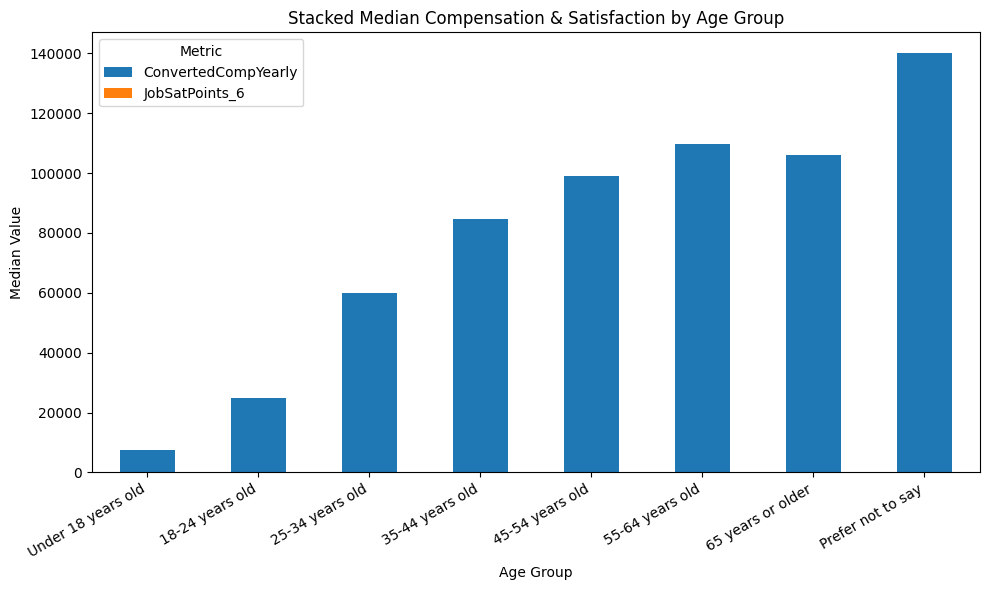

In [21]:
##Write your code here
# Group by age range and compute medians
age_summary = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Optional: reorder age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
age_summary = age_summary.reindex(age_order)

# Plot as stacked bar chart
ax = age_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Stacked Median Compensation & Satisfaction by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Median Value')
ax.set_xticklabels(age_summary.index, rotation=30, ha='right')
ax.legend(title='Metric')
plt.tight_layout()
plt.show()


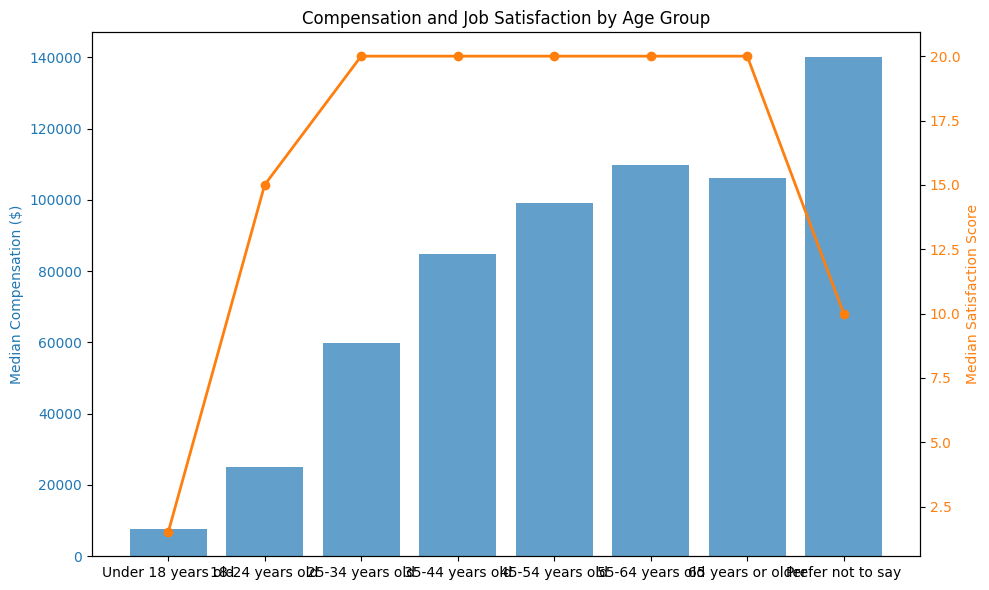

In [22]:
import matplotlib.pyplot as plt

# Group and reindex by age (same as before)
age_summary = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
age_summary = age_summary.reindex(age_order)

# Create dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for compensation (left y-axis)
color1 = 'tab:blue'
ax1.bar(age_summary.index, age_summary['ConvertedCompYearly'], color=color1, alpha=0.7, label='Compensation')
ax1.set_ylabel('Median Compensation ($)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second axis for satisfaction (right y-axis)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.plot(age_summary.index, age_summary['JobSatPoints_6'], color=color2, marker='o', linewidth=2, label='Satisfaction')
ax2.set_ylabel('Median Satisfaction Score', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Titles and layout
plt.title('Compensation and Job Satisfaction by Age Group')
fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.show()


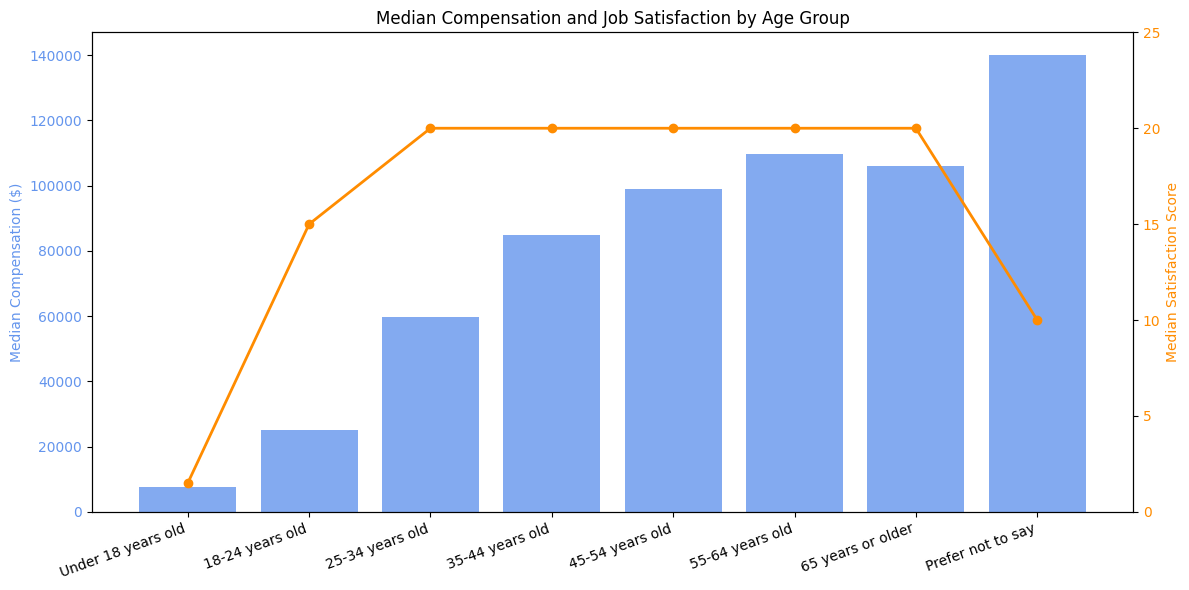

In [23]:
import matplotlib.pyplot as plt

# Reuse existing age_summary and age_order from earlier steps
fig, ax1 = plt.subplots(figsize=(12, 6))  # slightly wider

# Bar plot: Compensation
color1 = 'cornflowerblue'
ax1.bar(age_summary.index, age_summary['ConvertedCompYearly'], color=color1, alpha=0.8)
ax1.set_ylabel('Median Compensation ($)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Rotate x-ticks for clarity
ax1.set_xticks(range(len(age_summary)))
ax1.set_xticklabels(age_summary.index, rotation=20, ha='right')

# Line plot: Satisfaction (on right y-axis)
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.plot(age_summary.index, age_summary['JobSatPoints_6'], color=color2, marker='o', linewidth=2)
ax2.set_ylabel('Median Satisfaction Score', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 25)  # Add headroom above max satisfaction value

# Titles and layout
plt.title('Median Compensation and Job Satisfaction by Age Group')
fig.tight_layout()
plt.show()


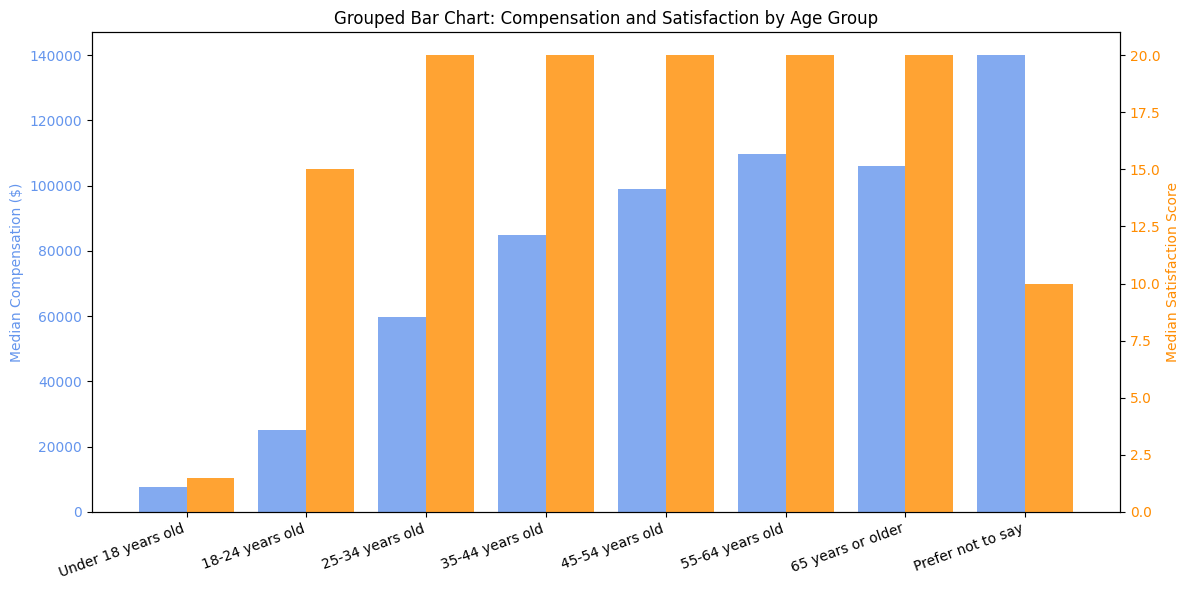

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# X-axis positions
x = np.arange(len(age_summary))
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for compensation (left y-axis)
color1 = 'cornflowerblue'
bars1 = ax1.bar(x - bar_width/2, age_summary['ConvertedCompYearly'], width=bar_width,
                label='Compensation', color=color1, alpha=0.8)
ax1.set_ylabel('Median Compensation ($)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Bar chart for satisfaction (right y-axis)
ax2 = ax1.twinx()
color2 = 'darkorange'
bars2 = ax2.bar(x + bar_width/2, age_summary['JobSatPoints_6'], width=bar_width,
                label='Satisfaction', color=color2, alpha=0.8)
ax2.set_ylabel('Median Satisfaction Score', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(age_summary.index, rotation=20, ha='right')

# Title and layout
plt.title('Grouped Bar Chart: Compensation and Satisfaction by Age Group')
fig.tight_layout()
plt.show()


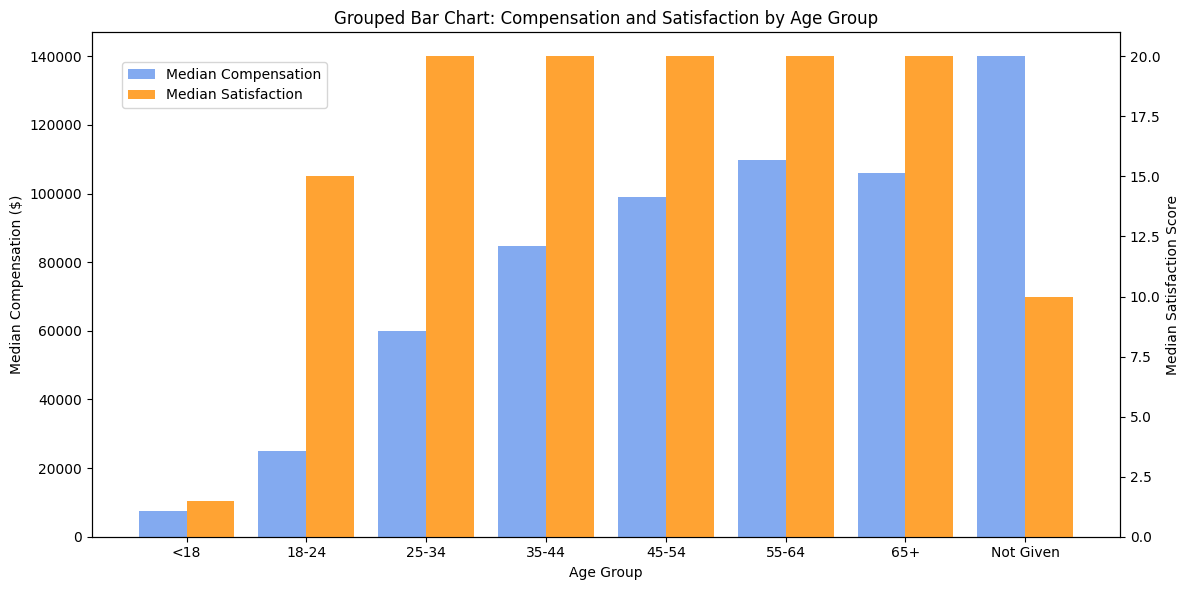

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Clean and shorten age labels
clean_labels = [label.replace(' years old', '') for label in age_summary.index]
clean_labels = ['65+' if '65' in label else label for label in clean_labels]
clean_labels = [label.replace('Under 18', '<18').replace('Prefer not to say', 'Not Given') for label in clean_labels]

# X-axis positions
x = np.arange(len(age_summary))
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for compensation (left y-axis)
bars1 = ax1.bar(x - bar_width/2, age_summary['ConvertedCompYearly'], width=bar_width,
                label='Median Compensation', color='cornflowerblue', alpha=0.8)
ax1.set_ylabel('Median Compensation ($)', color='black')
ax1.tick_params(axis='y', colors='black')

# Bar chart for satisfaction (right y-axis)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, age_summary['JobSatPoints_6'], width=bar_width,
                label='Median Satisfaction', color='darkorange', alpha=0.8)
ax2.set_ylabel('Median Satisfaction Score', color='black')
ax2.tick_params(axis='y', colors='black')

# Set cleaned x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(clean_labels, rotation=0, ha='center')
ax1.tick_params(axis='x', colors='black')
ax1.set_xlabel('Age Group', color='black')

# Title
plt.title('Grouped Bar Chart: Compensation and Satisfaction by Age Group', color='black')

# Combined legend
lines = [bars1, bars2]
labels = [bar.get_label() for bar in lines]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Layout
fig.tight_layout()
plt.show()



### **Key Insights from the Chart**

#### 1. **Compensation and Satisfaction Generally Rise Together…**

* From `<18` through `65+`, both **median compensation** and **job satisfaction** generally **increase with age**.
* This is consistent with expected trends: older workers tend to earn more (experience, seniority) and may find roles that better fit their interests/values.

---

#### 2. **Satisfaction Plateaus Earlier Than Compensation**

* While compensation continues to rise through middle age (`25–64`), **satisfaction plateaus at its maximum** around age 25 and **stays flat**.
* This suggests:

  * Younger workers may quickly reach peak satisfaction.
  * Job satisfaction may be more closely tied to **role fit** or **personal values**, not ongoing salary increases.

---

#### 3. **The “Not Given” Group Breaks the Pattern**

* Despite the **highest compensation**, the **“Not Given”** group reports **noticeably lower satisfaction**.
* This could reflect:

  * A group that values **privacy** or is **less engaged**,
  * Or outliers such as high-paid but stressed or dissatisfied individuals (execs, consultants, etc.).

---

#### 4. **High Satisfaction in the 25–64 Range**

* These age groups report both **high pay** and **high satisfaction**, suggesting an overall alignment between compensation and career contentment.
* This may represent the **“career sweet spot”** for many professionals.

---

#### 5. **Low Satisfaction at the Extremes**

* `<18` and `Not Given` both show **relatively low satisfaction**, even though their situations are very different.

  * `<18`: Possibly interns, early learners, low-pay part-time roles.
  * `Not Given`: High pay, low fulfillment?

---

### Potential Follow-up:

* Break this out by **job role**, **industry**, or **region** to see where satisfaction lags behind compensation.
* Try correlation analysis or regression to formally test these trends.


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


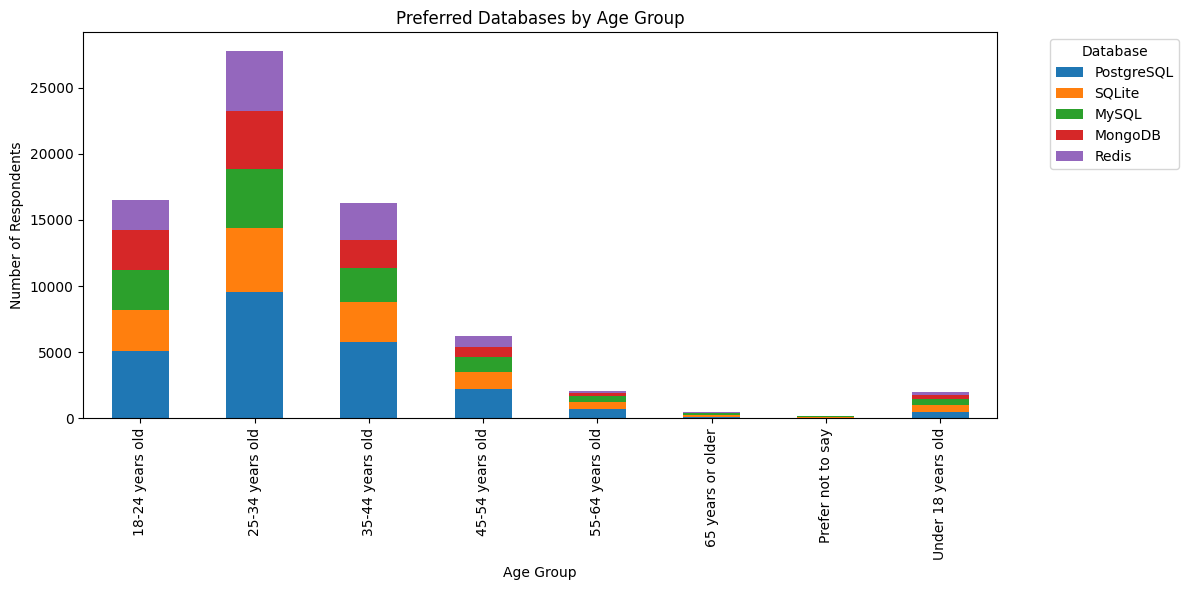

In [29]:
##Write your code here
# Step 1: Filter rows with known Age and DatabaseWantToWorkWith
df_db_age = df[['Age', 'DatabaseWantToWorkWith']].dropna().copy()

# Step 2: Expand multi-response column
df_db_age['DatabaseWantToWorkWith'] = df_db_age['DatabaseWantToWorkWith'].str.split(';')

# Step 3: Explode rows
df_db_age = df_db_age.explode('DatabaseWantToWorkWith')

# Step 4: Count responses per age group
db_counts = df_db_age.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Optional: Limit to top 5 most common databases overall
top_databases = df_db_age['DatabaseWantToWorkWith'].value_counts().nlargest(5).index
db_counts = db_counts[top_databases]

# Step 5: Plot
ax = db_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_title('Preferred Databases by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Respondents')
ax.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


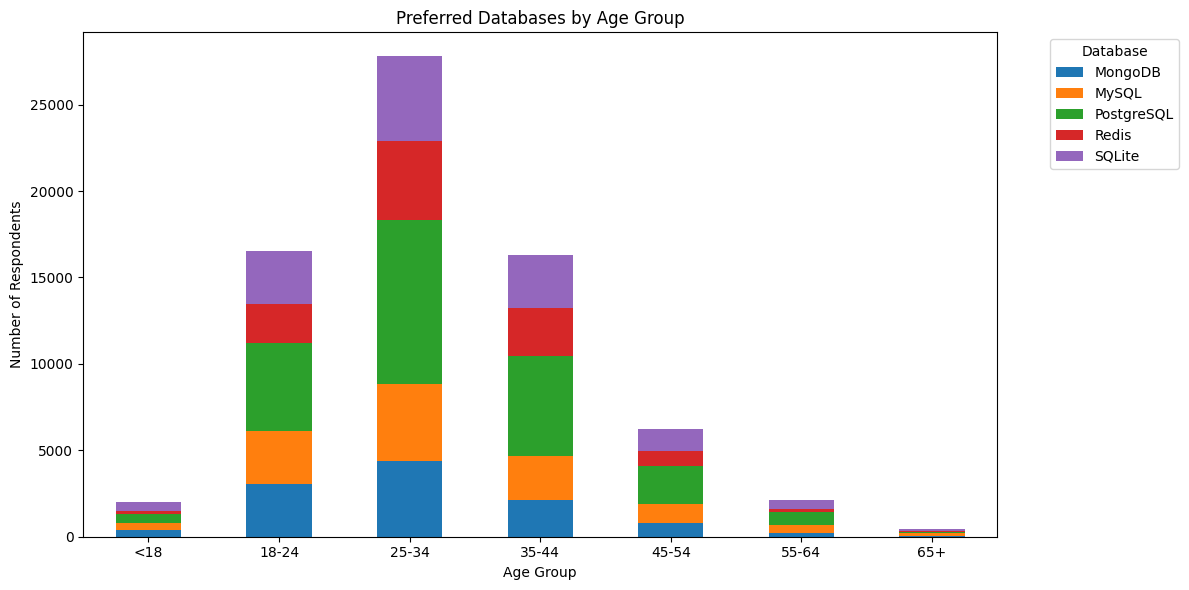

In [30]:
import matplotlib.pyplot as plt

# Step 1: Filter, explode, and count
df_db_age = df[['Age', 'DatabaseWantToWorkWith']].dropna().copy()
df_db_age['DatabaseWantToWorkWith'] = df_db_age['DatabaseWantToWorkWith'].str.split(';')
df_db_age = df_db_age.explode('DatabaseWantToWorkWith')

# Step 2: Get top 5 databases overall
top_databases = df_db_age['DatabaseWantToWorkWith'].value_counts().nlargest(5).index

# Step 3: Group and pivot
db_counts = (
    df_db_age[df_db_age['DatabaseWantToWorkWith'].isin(top_databases)]
    .groupby(['Age', 'DatabaseWantToWorkWith'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Drop 'Prefer not to say' and reorder age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
db_counts = db_counts.drop(index='Prefer not to say', errors='ignore')
db_counts = db_counts.reindex(age_order)

# Step 5: Create cleaned x-axis labels
clean_labels = [label.replace(' years old', '') for label in db_counts.index]
clean_labels = ['65+' if '65' in label else label for label in clean_labels]
clean_labels = [label.replace('Under 18', '<18') for label in clean_labels]

# Step 6: Plot
ax = db_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xticks(range(len(clean_labels)))
ax.set_xticklabels(clean_labels, rotation=0, ha='center')

ax.set_title('Preferred Databases by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Respondents')
ax.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [34]:
# Combine both unemployment types into a single category
df['EmploymentSimplified'] = df['EmploymentSimplified'].replace({
    'Unemployed (seeking)': 'Unemployed',
    'Unemployed (not seeking)': 'Unemployed'
})


/tmp/ipykernel_301/3013584489.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sat.groupby(['SatisfactionGroup', 'EmploymentSimplified'])


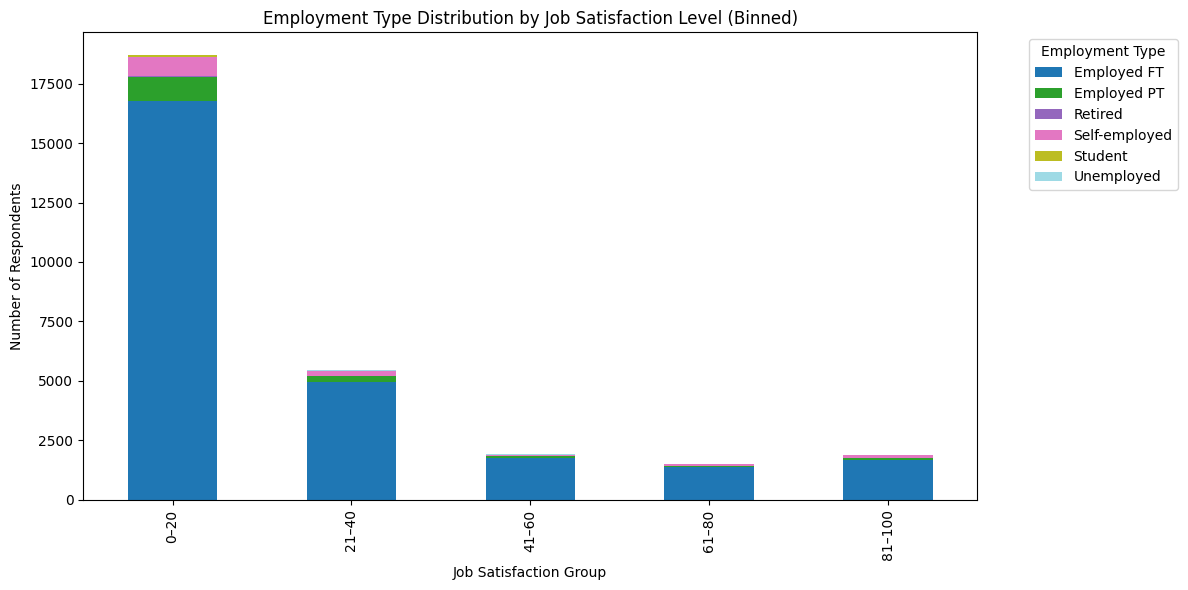

In [35]:
# Step 1: Filter and copy
df_sat = df[['JobSatPoints_6', 'EmploymentSimplified']].dropna().copy()

# Step 2: Bin satisfaction scores
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
df_sat['SatisfactionGroup'] = pd.cut(df_sat['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Count employment types per satisfaction group
employment_counts = (
    df_sat.groupby(['SatisfactionGroup', 'EmploymentSimplified'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Plot
ax = employment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
ax.set_title('Employment Type Distribution by Job Satisfaction Level (Binned)')
ax.set_xlabel('Job Satisfaction Group')
ax.set_ylabel('Number of Respondents')
ax.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_301/4222991357.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sat.groupby(['SatisfactionGroup', 'EmploymentSimplified'])


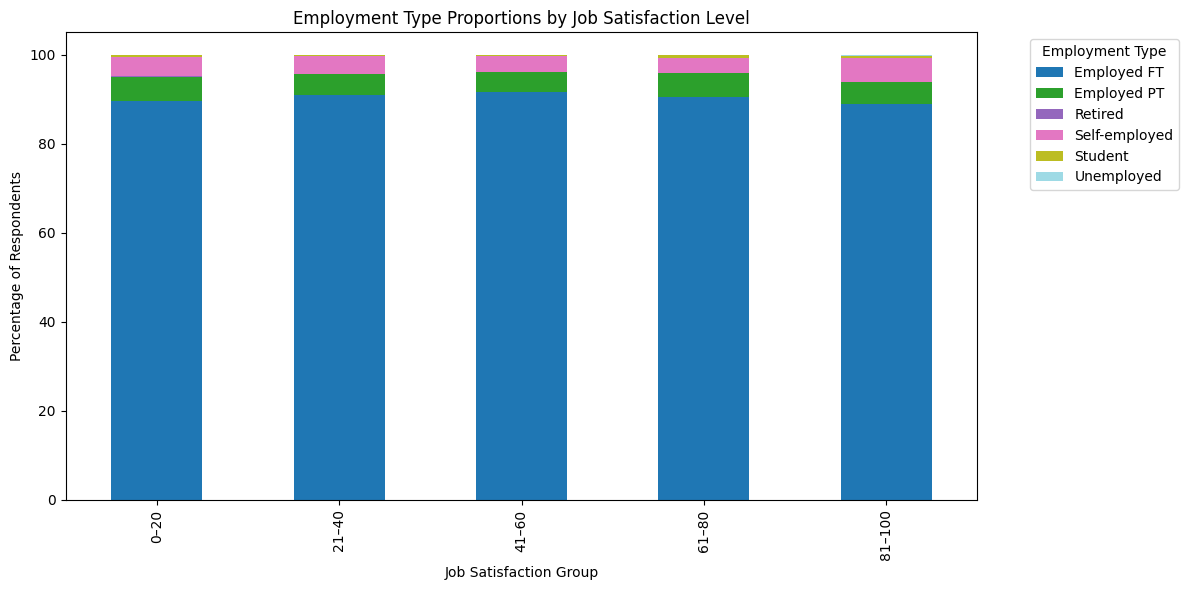

In [36]:
# Step 1: Filter and copy
df_sat = df[['JobSatPoints_6', 'EmploymentSimplified']].dropna().copy()

# Step 2: Bin satisfaction scores
bins = [0, 20, 40, 60, 80, 100]
labels = ['0–20', '21–40', '41–60', '61–80', '81–100']
df_sat['SatisfactionGroup'] = pd.cut(df_sat['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Step 3 (updated): Count and normalize within each satisfaction group
employment_props = (
    df_sat.groupby(['SatisfactionGroup', 'EmploymentSimplified'])
    .size()
    .unstack(fill_value=0)
)

# Normalize to percentages
employment_props = employment_props.div(employment_props.sum(axis=1), axis=0) * 100

# Step 4: Plot normalized stacked bar chart
ax = employment_props.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

ax.set_title('Employment Type Proportions by Job Satisfaction Level')
ax.set_xlabel('Job Satisfaction Group')
ax.set_ylabel('Percentage of Respondents')
ax.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


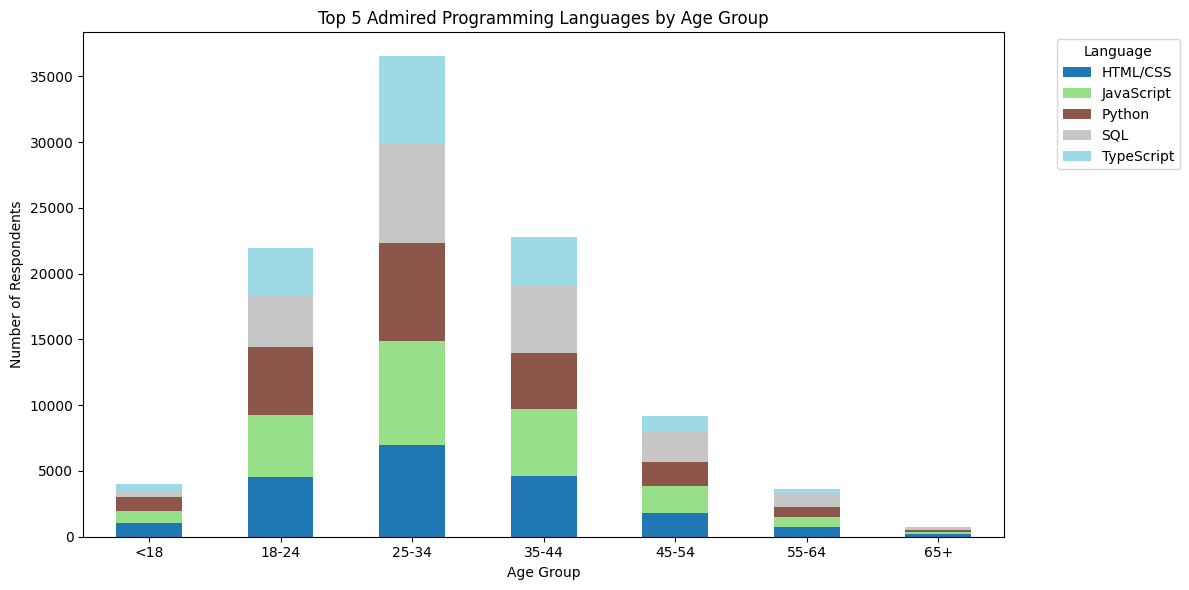

In [37]:
##Write your code here
# Step 1: Prepare the data
df_lang = df[['Age', 'LanguageAdmired']].dropna().copy()
df_lang['LanguageAdmired'] = df_lang['LanguageAdmired'].str.split(';')
df_lang = df_lang.explode('LanguageAdmired')

# Step 2: Focus on top 5 admired languages
top_languages = df_lang['LanguageAdmired'].value_counts().nlargest(5).index
df_lang = df_lang[df_lang['LanguageAdmired'].isin(top_languages)]

# Step 3: Group and pivot
lang_counts = (
    df_lang.groupby(['Age', 'LanguageAdmired'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Clean and reorder age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
lang_counts = lang_counts.drop(index='Prefer not to say', errors='ignore')
lang_counts = lang_counts.reindex(age_order)

# Clean age labels
clean_labels = [label.replace(' years old', '') for label in lang_counts.index]
clean_labels = ['65+' if '65' in label else label for label in clean_labels]
clean_labels = [label.replace('Under 18', '<18') for label in clean_labels]

# Step 5: Plot
ax = lang_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
ax.set_xticks(range(len(clean_labels)))
ax.set_xticklabels(clean_labels, rotation=0, ha='center')

ax.set_title('Top 5 Admired Programming Languages by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Respondents')
ax.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


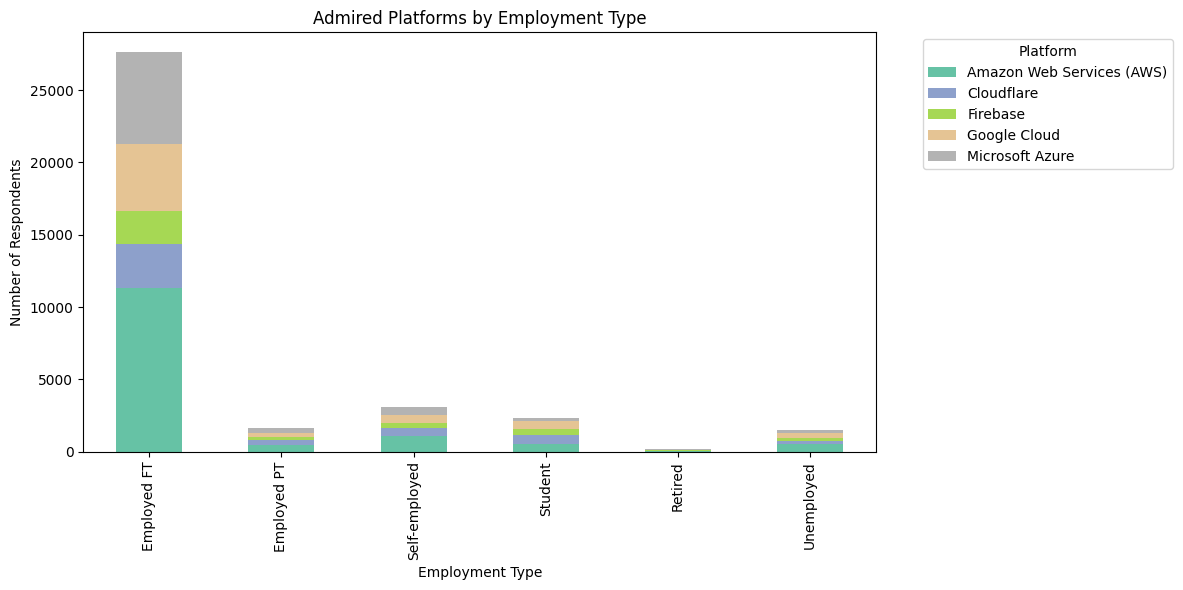

In [38]:
##Write your code here
# Step 1: Prep platform and employment data
df_platform = df[['EmploymentSimplified', 'PlatformAdmired']].dropna().copy()
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')

# Step 2: Focus on top 5 admired platforms
top_platforms = df_platform['PlatformAdmired'].value_counts().nlargest(5).index
df_platform = df_platform[df_platform['PlatformAdmired'].isin(top_platforms)]

# Step 3: Count and pivot
platform_counts = (
    df_platform.groupby(['EmploymentSimplified', 'PlatformAdmired'])
    .size()
    .unstack(fill_value=0)
)

# Optional: reorder employment categories if needed
custom_order = [
    'Employed FT', 'Employed PT', 'Self-employed', 'Student', 'Retired', 'Unemployed'
]
platform_counts = platform_counts.reindex(custom_order)

# Step 4: Plot
ax = platform_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
ax.set_title('Admired Platforms by Employment Type')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Number of Respondents')
ax.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [45]:
df['EmploymentSimplified'].unique()

array(['Employed FT', 'Student', 'Self-employed', 'Unemployed',
       'Employed PT', 'Other/Prefer not to say', 'Retired'], dtype=object)

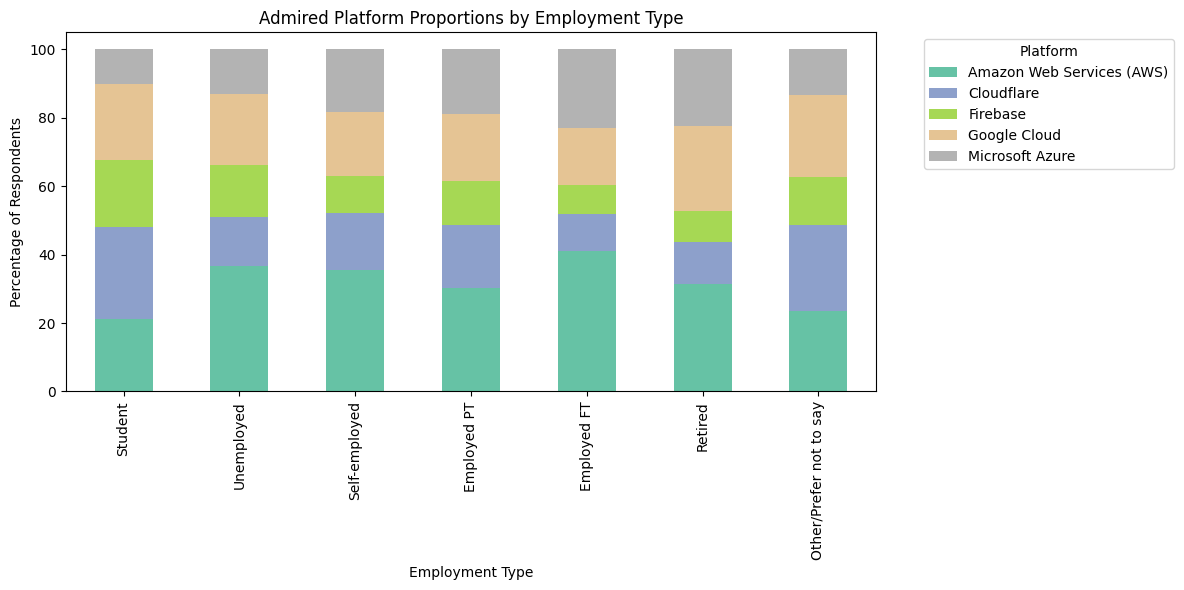

In [46]:
##Write your code here
# Step 1: Prep platform and employment data
df_platform = df[['EmploymentSimplified', 'PlatformAdmired']].dropna().copy()
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')
df_platform = df_platform.explode('PlatformAdmired')

# Step 2: Focus on top 5 admired platforms
top_platforms = df_platform['PlatformAdmired'].value_counts().nlargest(5).index
df_platform = df_platform[df_platform['PlatformAdmired'].isin(top_platforms)]

# Step 3: Count and pivot
platform_counts = (
    df_platform.groupby(['EmploymentSimplified', 'PlatformAdmired'])
    .size()
    .unstack(fill_value=0)
)

# Normalize to percentages within each employment type
platform_props = platform_counts.div(platform_counts.sum(axis=1), axis=0) * 100

# Optional: reorder employment categories if needed
custom_order = [
    'Student',  'Unemployed', 'Self-employed',
    'Employed PT', 'Employed FT', 'Retired', 'Other/Prefer not to say'
]

platform_counts = platform_counts.reindex(custom_order)


# Apply the custom order
platform_props = platform_props.reindex(custom_order)

# Plot normalized stacked bar chart
ax = platform_props.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

ax.set_title('Admired Platform Proportions by Employment Type')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Percentage of Respondents')
ax.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


 The stacked percentage chart reveals some subtle but meaningful patterns across employment types. Here’s a breakdown of the key insights:

---

### **1. AWS Dominates Across All Employment Types**

* **Amazon Web Services (AWS)** is consistently the most admired platform.
* Admiration peaks with **Employed Part-Time and Employed Full-Time** groups (up to \~40%+), suggesting that AWS is strongly associated with professional development and enterprise exposure.

---

### **2. Self-Employed and Students Show the Most Diverse Preferences**

* **Self-employed** and **Students** show the most **even distribution** across platforms.
* **Cloudflare** and **Firebase** have a relatively larger share here, suggesting that:

  * These groups may value platforms that support rapid deployment, simpler integration, or solo development workflows.
  * They may also be **more exploratory** or influenced by open-source and web-native ecosystems.

---

### **3. Retired Respondents Skew Heavily Toward Microsoft Azure**

* Retired individuals show **noticeably higher admiration** for **Microsoft Azure** compared to other groups.
* This could reflect:

  * **Legacy enterprise experience** (e.g., long-term Microsoft ecosystems),
  * Preference for platforms with deep .NET integration or long-term institutional exposure.

---

### **4. Unemployed Individuals Still Show Strong AWS Interest**

* Despite not being employed, this group mirrors the employed groups in AWS admiration.
* This could reflect:

  * **Training or upskilling efforts** focused on in-demand cloud skills,
  * Market awareness of AWS as a resume-booster.

---

### **5. “Prefer not to say” Differs Significantly**

* This group shows the **lowest admiration for AWS** and **highest for Google Cloud**.
* It might represent a mix of non-traditional or privacy-conscious respondents, or those outside standard employment categories.

---

### **Suggestions for Follow-up (Optional):**

* Break down **students by full-time vs part-time** to see if preferences shift by workload or experience.
* Investigate **career transitions**: do students who become self-employed maintain the same admiration profiles?


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
